<a href="https://colab.research.google.com/github/Brendanb93/Projects/blob/main/Hk_racing_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hong Kong Horse Racing 1997-2005

## 1. Data review and cleaning

Data from [Kaggle](https://www.kaggle.com/datasets/gdaley/hkracing), it is comprised of data from several free sources.

* Races.csv contains details on the race
* Runs.csv contains details on the horses in the race

In [ ]:
#Import required libraries
import numpy as np
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
#mounting drive to access the data files
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
#Read in and print the first data file
horse = pd.read_csv("Hk_racing/runs.csv")
horse.head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


In [ ]:
#Read in and print the second data file
race= pd.read_csv("Hk_racing/races.csv")
race.head()

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,...,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,...,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,...,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,...,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN


In [ ]:
#Create a dataframe containing the columns we need from the horse_det datafile
horse_det = horse[['race_id', 'horse_id', 'won', 'horse_age', 'horse_country', 'horse_type','draw','time1', 'win_odds']]
horse_det.head()

,race_id,horse_id,won,horse_age,horse_country,horse_type,draw,time1,win_odds
0,0,3917,0.0,3,AUS,Gelding,7,13.85,9.7
1,0,2157,0.0,3,NZ,Gelding,12,14.57,16.0
2,0,858,0.0,3,NZ,Gelding,8,13.69,3.5
3,0,1853,0.0,3,SAF,Gelding,13,14.09,39.0
4,0,2796,0.0,3,GB,Gelding,14,14.77,50.0


In [ ]:
#Create a dataframe containing the columns we need from the race_det datafile
race_det = race[['race_id', 'venue', 'going', 'distance', 'date']]
race_det.head()

,race_id,venue,going,distance,date
0,0,ST,GOOD TO FIRM,1400,1997-06-02
1,1,ST,GOOD TO FIRM,1200,1997-06-02
2,2,ST,GOOD TO FIRM,1400,1997-06-02
3,3,ST,GOOD TO FIRM,1200,1997-06-02
4,4,ST,GOOD TO FIRM,1600,1997-06-02


In [ ]:
#Merge the two datasets based on the key race_id
form = pd.merge(race_det, horse_det)
form.head()

,race_id,venue,going,distance,date,horse_id,won,horse_age,horse_country,horse_type,draw,time1,win_odds
0,0,ST,GOOD TO FIRM,1400,1997-06-02,3917,0.0,3,AUS,Gelding,7,13.85,9.7
1,0,ST,GOOD TO FIRM,1400,1997-06-02,2157,0.0,3,NZ,Gelding,12,14.57,16.0
2,0,ST,GOOD TO FIRM,1400,1997-06-02,858,0.0,3,NZ,Gelding,8,13.69,3.5
3,0,ST,GOOD TO FIRM,1400,1997-06-02,1853,0.0,3,SAF,Gelding,13,14.09,39.0
4,0,ST,GOOD TO FIRM,1400,1997-06-02,2796,0.0,3,GB,Gelding,14,14.77,50.0


In [ ]:
#Review the size of the merged dataset
form.shape

(79447, 13)

In [ ]:
#Review the missingvalues
form.isnull().any()

race_id          False
venue            False
going            False
distance         False
date             False
horse_id         False
won              False
horse_age        False
horse_country     True
horse_type        True
draw             False
time1            False
win_odds         False
dtype: bool

In [ ]:
#Drop the missing values
form = form.dropna()

In [ ]:
#Review the size of the dataset
form.shape

(79445, 13)

In [ ]:
#count the unique values for horses and races
count_horse = form.horse_id.nunique()
count_race = form.race_id.nunique()

print('Number of horses:', count_horse,'\nNumber of races:', count_race)


Number of horses: 4404 
Number of races: 6348


In [ ]:
#Count the grouped country values
form.horse_country.value_counts()

AUS    29906
NZ     27497
IRE    10473
GB      6329
USA     2499
FR      1257
SAF      685
GER      357
ARG      127
JPN       93
CAN       91
ITY       66
GR        33
BRZ       18
ZIM       12
SPA        2
Name: horse_country, dtype: int64

In [ ]:
#Group the countries with <10% together in an other category
horse_cntry_cnt = form.horse_country.value_counts()
horse_cntry_clc = (horse_cntry_cnt/horse_cntry_cnt.sum()*100).lt(1)
form['horse_country'] = np.where(form['horse_country'].isin(horse_cntry_cnt[horse_cntry_clc].index),'Other',form['horse_country'])

<ipython-input-101-407177f873a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  form['horse_country'] = np.where(form['horse_country'].isin(horse_cntry_cnt[horse_cntry_clc].index),'Other',form['horse_country'])


In [ ]:
form.horse_country.value_counts()

AUS      29906
NZ       27497
IRE      10473
GB        6329
USA       2499
Other     1484
FR        1257
Name: horse_country, dtype: int64

In [ ]:
form.going.value_counts()

GOOD                51388
GOOD TO FIRM        20409
GOOD TO YIELDING     4131
YIELDING             1082
FAST                  878
WET SLOW              771
WET FAST              247
SLOW                  187
YIELDING TO SOFT      177
SOFT                  175
Name: going, dtype: int64

In [ ]:
#Create a map for the data from mixed track condition standards to the Australian convention

condition_map = {
    'GOOD TO FIRM': 'GOOD', 'GOOD': 'GOOD',
    'FAST': 'GOOD', 'GOOD TO YIELDING': 'SOFT',
    'YIELDING': 'SOFT', 'YIELDING TO SOFT': 'SOFT',
    'SOFT': 'SOFT', 'WET SLOW': 'HEAVY', 'WET FAST': 'HEAVY', 'SLOW': 'HEAVY'
}
#apply the mapping to the data set
form['track_condition']=form.going.map(condition_map).fillna('Other')

In [ ]:
form.track_condition.value_counts()

GOOD     72675
SOFT      5565
HEAVY     1205
Name: track_condition, dtype: int64

In [ ]:
#review the distribution of distances
form.distance.value_counts()

1200    24696
1400    14565
1650    13253
1000     8523
1600     8329
1800     7320
2000     1463
2200     1034
2400      262
Name: distance, dtype: int64

In [ ]:
#review the distribution of venues
form.venue.value_counts()

ST    51946
HV    27499
Name: venue, dtype: int64

In [ ]:
#review the distribution of ages
form.horse_age.value_counts()

3     61210
4      8007
5      4775
6      2244
2      2098
7       839
8       225
9        41
10        6
Name: horse_age, dtype: int64

In [ ]:
#Remove horses aged 9+ from the dataset
form = form[(form.horse_age != 9) & (form.horse_age != 10)]

In [ ]:
form.horse_age.value_counts()

3    61210
4     8007
5     4775
6     2244
2     2098
7      839
8      225
Name: horse_age, dtype: int64

In [ ]:
#review the distribution of barrier draws
form.draw.value_counts()

4     6310
5     6309
2     6307
3     6304
1     6304
6     6293
7     6277
8     6264
9     6192
10    6091
11    5906
12    5538
13    2778
14    2524
15       1
Name: draw, dtype: int64

There is only a single race using barrier 15 so i will remove that row.

In [ ]:
#remove barrier 15 from the dataset
form = form[(form.draw != 15)]

The dataset covers around 8 years of racing data

In [ ]:
#review the period the dataset covers
start_time = min(form.date)
end_time = max(form.date)
print("start date:",start_time,"\nend date", end_time)

start date: 1997-06-02 
end date 2005-08-28


## Analysis


Quick check of horse winrates overall and against a few characteristics

**Overall**

In [ ]:
#Group horse_id and won and then rename the columns broken in the indexing
winloss = form.groupby(['horse_id', 'won']).size().unstack().reset_index()
winloss = winloss.rename(columns={0.0: 'lose', 1.0: 'win'})

#Calculate and print the average winrate
winloss['winrate'] = winloss.win/(winloss.lose+winloss.win)
average = round(winloss['winrate'].mean()*100,2)
print ('The average winrate of all horses is:', average,'%')

The average winrate of all horses is: 12.22 %


**Horse type**

<Axes: ylabel='horse_type'>

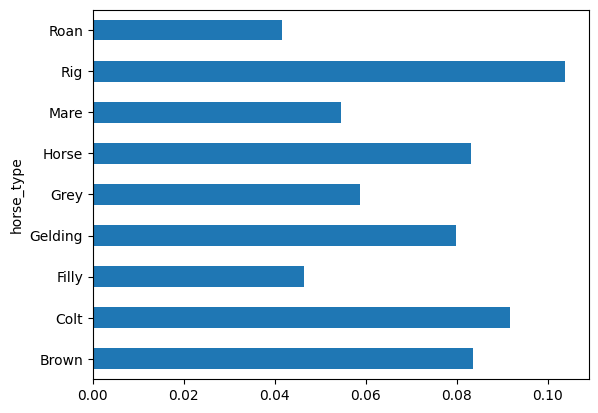

In [ ]:
#Group by horse type and winrate and then plot the resulting bar graph
winrateage = form.groupby(['horse_type'])['won'].mean()

winrateage.plot.barh()

**Country**

<Axes: ylabel='horse_country'>

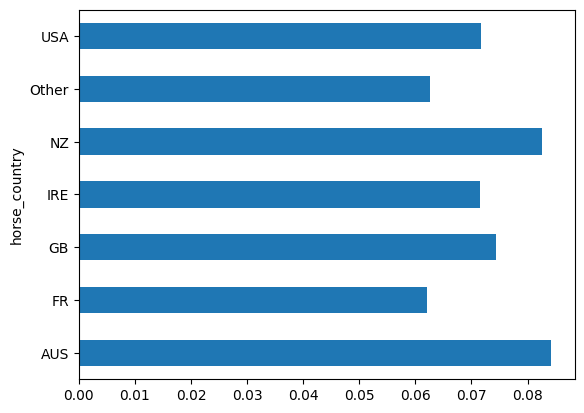

In [ ]:
#Group by horse_country type and winrate and then plot the resulting bar graph
winratecntry = form.groupby(['horse_country'])['won'].mean()

winratecntry
winratecntry.plot.barh()

### 1. Starting odds as a measure of the horses ability

**The Favourite**

In [ ]:
#Group by winodds and race id
best_win = form.groupby('race_id')['win_odds']

#create 2 columns and fill dependant on min odds and max odds horse in race
minmaxodds = form.assign(min=best_win.transform(min), max=best_win.transform(max))
#find the lowest horse in each race and check if they won
minmaxodds['ismin'] = ((minmaxodds['min'] == minmaxodds['win_odds']) & minmaxodds['won'].ge(1))*1
#Calculate the mean and print
isminwin = round(minmaxodds['ismin'].sum()/minmaxodds['race_id'].nunique(),3)*100
print ('The winrate of the lowest odds horse is:', isminwin,'%')

The winrate of the lowest odds horse is: 30.3 %


**The Outsider**

In [ ]:
#find the highest horse in each race and check if they won
minmaxodds['ismax'] = ((minmaxodds['max'] == minmaxodds['win_odds']) & minmaxodds['won'].ge(1))*1

#Calculate the mean and print
ismaxwin = round(minmaxodds['ismax'].sum()/minmaxodds['race_id'].nunique(),3)*100
print ('The winrate of the highest odds horse is:', ismaxwin,'%')

The winrate of the highest odds horse is: 1.0 %


In [ ]:
# Group by race id
mean_check = minmaxodds.groupby('race_id')
#Calculate mean odds and print
mean_fav = mean_check['min'].mean()
mean_rough = mean_check['max'].mean()
mean_rough.mean()
mean_fav.mean()
print ('The average odds of the favouite in each race', '$',round(mean_fav.mean(), 3),
'\n The average odds of the roughest horse in each race','$',round(mean_rough.mean(),3))

The average odds of the favouite in each race $ 3.093 
 The average odds of the roughest horse in each race $ 83.92


### 2. The fastest jumper / early leader

**Fastest early sectionals**

In [ ]:
#Group by time1(first sectional) and race id
jump_speed = form.groupby('race_id')['time1']
#create 2 columns and fill dependant on min time1 and time1 horse in race
minmaxjump = form.assign(min=jump_speed.transform(min), max=jump_speed.transform(max))
#find the fastest jumping horse in each race and check if they won
minmaxjump['ismin'] = ((minmaxjump['min'] == minmaxjump['time1']) & minmaxjump['won'].ge(1))*1

#calculate the mean winrate and print
jump_fast = (minmaxjump['ismin'].sum()/minmaxjump['race_id'].nunique())*100
print ('The winrate of the fastest horse out of the gates is:', round(jump_fast, 2),'%')

The winrate of the fastest horse out of the gates is: 17.12 %


**Slowest early sectionals**

In [ ]:
#find the slowest jumping horse in each race and check if they won
minmaxjump['ismax'] = ((minmaxjump['max'] == minmaxjump['time1']) & minmaxjump['won'].ge(1))*1

#calculate the mean winrate and print
jump_slow = (minmaxjump['ismax'].sum()/minmaxjump['race_id'].nunique())*100
print ('The winrate of the slowest horse out of the gates is:', round(jump_slow,2),'%')

The winrate of the slowest horse out of the gates is: 3.56 %


### 3. Barriers

**Taking a look at the overall winrate for each barrier**

<Axes: title={'center': 'HK Racing Barrier winrate %'}, ylabel='draw'>

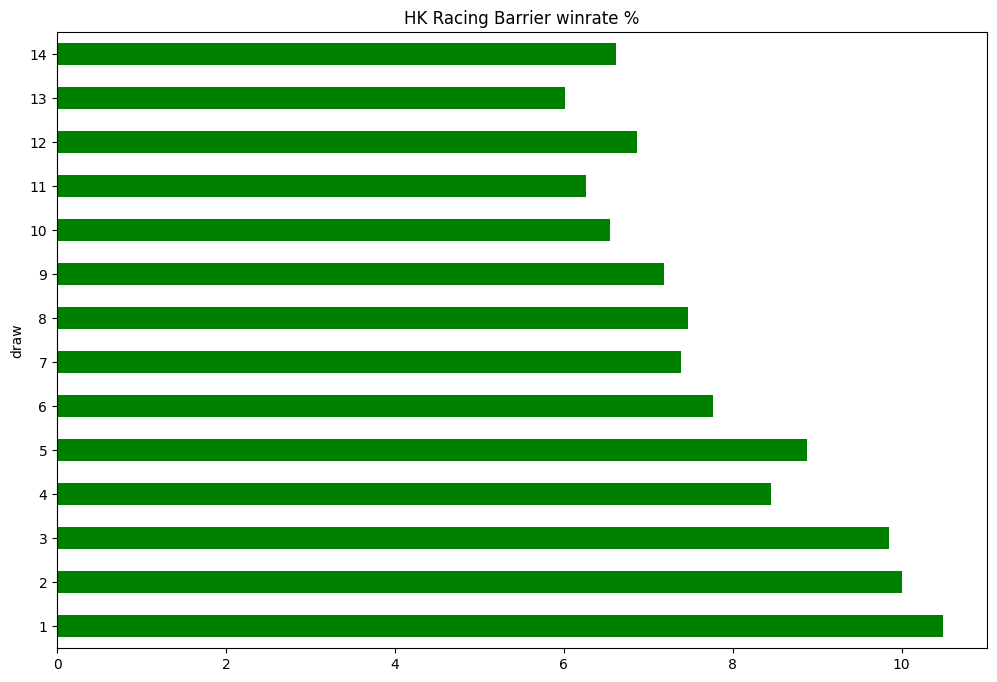

In [ ]:
#Group by draw and mean winrate
barrierwin = (form.groupby([ 'draw'])['won'].mean())*100

#create horizintal bar plot
barrierwin.plot(
    kind = 'barh',
    figsize=[12,8],
    title = "HK Racing Barrier winrate %",
    color = 'green'
)

**Breakdown by track**

*Note i have removed barriers 13 and 14 from the visual as they are not used at the Happy Valley race track

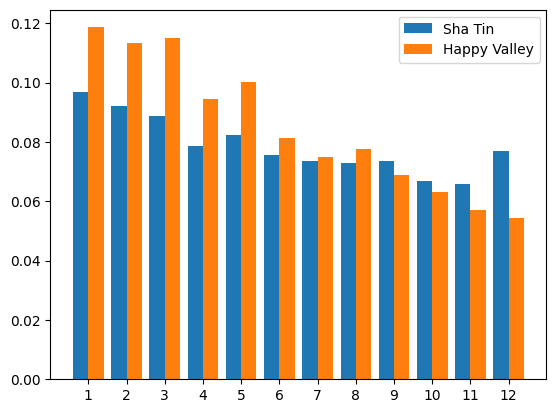

In [ ]:
#Filter by Sha tin
barrier_st = form.loc[form['venue'] == 'ST']
#remove barriers 13 and 14
barrier_st = barrier_st[(barrier_st.draw != 13) & (barrier_st.draw != 14)]
#calculate mean winrate
barrier_st = barrier_st.groupby(['draw'])['won'].mean()
#Filter by Happy Valley
barrier_hv = form.loc[form['venue'] == 'HV']
#remove barriers 13 and 14
barrier_hv = barrier_hv[(barrier_hv.draw != 13) & (barrier_hv.draw != 14)]
#calculate mean winrate
barrier_hv = barrier_hv.groupby([ 'draw'])['won'].mean()

#create x axis labels
bar_draw = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

#create plot and add bar labels
x_axis = np.arange(len(bar_draw))
plt.bar(x_axis -0.2, barrier_st, width=0.4, label = 'Sha Tin')
plt.bar(x_axis +0.2, barrier_hv, width=0.4, label = 'Happy Valley')
plt.xticks(x_axis, bar_draw)

#print plot
plt.legend()
plt.show()

### 4. Australian Horses

**Conditions and Distance**

<Axes: title={'center': 'Australian horses winrate by condition'}, xlabel='track_condition'>

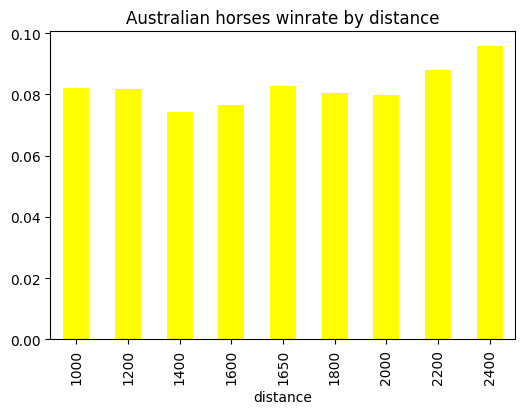

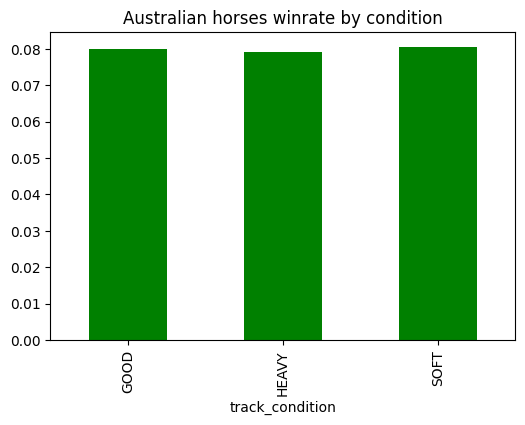

In [ ]:
#filter for australian horses
au_form = form.loc[form['horse_country'] == 'AUS']

#Calculate average winrate by distance for Australia
distance_au = form.groupby(['distance'])['won'].mean()
#create subplot
fig, ax = plt.subplots(ncols = 1, figsize=(10,4))
distance_au.plot(
    kind = 'bar',
    figsize=[6,4],
    title = "Australian horses winrate by distance",
    color = "yellow"
)

#Calculate average winrate by track condition for Australia
condition_au = form.groupby(['track_condition'])['won'].mean()
#create subplot
fig, ax = plt.subplots(ncols = 1 , figsize=(10,4))
condition_au.plot(
    kind = 'bar',
    figsize=[6,4],
    title = "Australian horses winrate by condition",
    color = "green"
)

## Notes & Future work

Overall, we gleamed some insights into the characteristics and other factors that lead to a horse winning a race. Outside of odd's and barrier draw, early race speed seemed to play the largest role in predicting whether a horse is likely to win. These factors are well known to impact a horses run and are taken into account by bookmakers, meaning relying on these factors is unlikely to result in a +EV strategy.

In the future, when i have the spare time i plan to try out some machine learning approaches on the dataset. With a focus on where a horses win odds are unnecessarily inflated due to the percieved importance of certain factors

Note the heatmap of correlations seen below was not produced until and end of this project, as the main purpose of this project was data exploration for the sake of data exploration.

In [ ]:
corr=form.corr()
corr.style.background_gradient(cmap='Spectral').set_precision(3)

<ipython-input-140-86d83a87181a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=form.corr()
<ipython-input-140-86d83a87181a>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='Spectral').set_precision(3)


,race_id,distance,horse_id,won,horse_age,draw,time1,win_odds
race_id,1.000,-0.019,-0.054,0.000,0.448,0.001,0.002,0.042
distance,-0.019,1.000,0.010,-0.000,0.084,0.000,0.147,-0.076
horse_id,-0.054,0.010,1.000,-0.003,-0.016,-0.002,0.012,0.001
won,0.000,-0.000,-0.003,1.000,-0.005,-0.049,-0.002,-0.191
horse_age,0.448,0.084,-0.016,-0.005,1.000,-0.010,0.027,-0.023
draw,0.001,0.000,-0.002,-0.049,-0.010,1.000,-0.016,0.155
time1,0.002,0.147,0.012,-0.002,0.027,-0.016,1.000,-0.027
win_odds,0.042,-0.076,0.001,-0.191,-0.023,0.155,-0.027,1.000


## Reference

1. Track info Hong Kong Jockey Club. Available at: https://racing.hkjc.com/racing/english/racing-info/racing_course.aspx (Accessed: December 3, 2022).

2. Hong Kong racecourses: Know your horse racetracks in Hong Kong (2020) www.progroupracing.com.au. Available at: https://www.progroupracing.com.au/hong-kong-racecourses (Accessed: December 2, 2022).

3. Gulum, Mehmet Akif, "Horse racing prediction using graph-based features." (2018). Electronic Theses and Dissertations. Paper 2953.
https://doi.org/10.18297/etd/2953

4. Donato, M. (2017) Cracking the horse racing code, Bleacher Report. Bleacher Report. Available at: https://bleacherreport.com/articles/27781-cracking-the-horse-racing-code (Accessed: December 4, 2022).

5. The eight most important analysis factors, Punters.com.au. Available at: https://www.punters.com.au/newsthe-eight-most-important-analysis-factors-20080612/ (Accessed: December 4, 2022).